In [1]:
#Reading The display_name, mean_location of nodes
display_df <- read.delim('display_name2.txt',header = F, sep = '\t')
mean_location_df <- read.delim('mean_location_coordinates.txt',header = F,encoding='UTF-8', sep = '\t')

In [2]:
nrow(display_df)


[1] 2710

In [3]:
nrow(mean_location_df)

[1] 2710

In [5]:
library("igraph")
# Creating graph and adding weight attribute to edges
edgelistFile<-read.table("location_edge_list.txt")
g=graph.data.frame(edgelistFile, directed=F)
g = set_edge_attr(g, 'weight', index = E(g), E(g)$V3)

# Q 7 Minimum Spanning Tree

In [6]:
#Minimum spanning tree
g_mst = mst(g, weights = E(g)$weight)

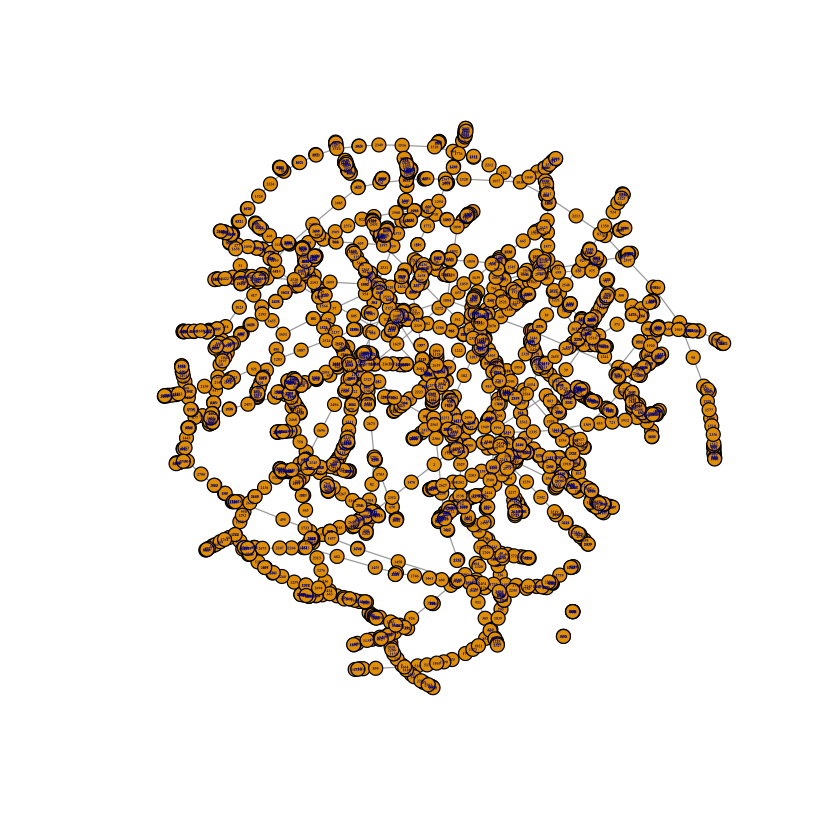

In [7]:
plot(g_mst,vertex.size=5,vertex.label.family="Times",vertex.label.font=2,vertex.label.cex=.2)

In [9]:
#Displaying location endpoints of 10 edges in minimum spanning tree # TODO: CHeck if names or ids of vertex
for(i in c(1:10)){
    edges = E(g_mst)
    e = edges[i*50]
    vl = c(ends(g_mst,e))
    cat(vl[1],vl[2])
    cat('\n')
    
    v1name = as.vector(display_df[,2])[which(display_df$V1 == vl[1])]
    v2name = as.vector(display_df[,2])[which(display_df$V1 == vl[2])]
    cat(v1name,'|',v2name)
    cat('\n')
}

37 1357
1800 Newcastle Drive, South Los Altos, Los Altos | 1300 Holly Avenue, Los Altos
73 1995
2100 Fieldcrest Avenue, Fairfield | 7600 Pleasants Valley Road, Vacaville
103 1555
35500 Ebro Court, Centerville, Fremont | 3600 Johnson Court, Northgate, Fremont
137 1219
700 Dellwood Court, Vacaville | 400 Shannon Drive, Vacaville
178 986
600 Sonoma Avenue, Livermore | 200 Quartz Circle, Livermore
216 1551
3700 Lake Ontario Drive, Lakes and Birds, Fremont | 100 Palm Drive, Union City
253 883
1000 Shasta Street, Vallejo | Skyline Court, Vallejo
297 2235
1400 Pembroke Way, Dixon | Harvard Drive, Dixon
342 1356
10400 Trinity Parkway, Bear Creek, Stockton | 12600 West Highway 12, Acampo
387 1584
2100 Manchester Road, San Leandro | 2700 Jennifer Drive, Castro Valley


# Q 8 

In [10]:
combinations = data.frame(expand.grid(rep(list(1:100), 3)))
shuffeled_c = combinations[sample(nrow(combinations)),]

In [11]:
v1l <- c(shuffeled_c$Var1)
v2l <- c(shuffeled_c$Var2)
v3l <- c(shuffeled_c$Var3)

In [12]:
cnt = 0
triangle_indices = c()
for(i in c(1:50000)){
    v1 = v1l[i]
    v2 = v2l[i]
    v3 = v3l[i]
    if(v1==v2 ||v2==v3||v3==v1){
        next
    }
    if(get.edge.ids(g,c(v1l[i],v2l[i]),directed = FALSE) !=0){
        if(get.edge.ids(g,c(v3l[i],v2l[i]),directed = FALSE) !=0){
            if(get.edge.ids(g,c(v1l[i],v3l[i]),directed = FALSE)!=0){
#                 print(v1)
#                 print(v2)
#                 print(v3)
                cnt = cnt+1
#                 print(g[v1,v2, edges=TRUE])
#                 print(g[v3,v2, edges=TRUE])
#                 print(g[v1,v3, edges=TRUE])
#                 print("-------")
                triangle_indices = c(triangle_indices, i)
            }
        }
    }       
}

In [13]:
cnt

[1] 1284

In [14]:
edge_l = E(g)
satisfied = 0
tc = 0
for(i in triangle_indices[1:1000]){
  tc = tc+1
    #print(i)
   ew1 = edge_l$weight[get.edge.ids(g,c(v1l[i],v2l[i]),directed = FALSE)]
   # print(ew1)
   ew2 = edge_l$weight[get.edge.ids(g,c(v3l[i],v2l[i]),directed = FALSE)]
   # print(ew2)
    
   ew3 = edge_l$weight[get.edge.ids(g,c(v3l[i],v1l[i]),directed = FALSE)]
   # print(ew3)
    
    #cat(v3l[i],v2l[i],v1l[i],'\n')
    
   if(ew1+ew2>ew3){
       if(ew1+ew3>ew2){
           if(ew2+ew3>ew1){
               satisfied = satisfied + 1
           }
       }
   }
    
}

In [15]:
satisfied

[1] 915